In [4]:
ch_mult = [1,2,4,8]
num_resolutions = len(ch_mult)
for i_level in reversed(range(num_resolutions)):
    print(ch_mult[i_level])
  

8
4
2
1


In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Define the convolutional class
class SamePadConv3d(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size, stride=1, bias=True):
        super().__init__()
        if isinstance(kernel_size, int):
            kernel_size = (kernel_size,) * 3
        if isinstance(stride, int):
            stride = (stride,) * 3

        # assumes that the input shape is divisible by stride
        total_pad = tuple([k - s for k, s in zip(kernel_size, stride)])
        pad_input = []
        for p in total_pad[::-1]: # reverse since F.pad starts from last dim
            pad_input.append((p // 2 + p % 2, p // 2))
        pad_input = sum(pad_input, tuple())
        self.pad_input = pad_input

        self.conv = nn.Conv3d(in_channels, out_channels, kernel_size,
                              stride=stride, padding=0, bias=bias)

    def forward(self, x):
        return self.conv(F.pad(x, self.pad_input))

# Create an instance of the convolutional class
conv_module = SamePadConv3d(in_channels=240,out_channels=256,kernel_size=4,stride=2)

# Create a random input tensor (batch size, channels, time, height, width)
input_tensor = torch.randn(32, 240, 16, 64, 64)

# Pass the input tensor through the convolutional module
output_tensor = conv_module(input_tensor)

# Print the shapes of input and output tensors
print("Input tensor shape:", input_tensor.shape)
print("Output tensor shape:", output_tensor.shape)
print(conv_module.pad_input)


Input tensor shape: torch.Size([32, 240, 16, 64, 64])
Output tensor shape: torch.Size([32, 256, 8, 32, 32])
(1, 1, 1, 1, 1, 1)


In [4]:
import torch
threshold_s = 0.5
mean_prec = torch.tensor([[0.2, 0.4], [0.6, 0.8]])
threshold = torch.ones(mean_prec.size())*threshold_s
labels_classification = (mean_prec > threshold).float()
print(threshold)
print(labels_classification) 
print(mean_prec.size())

tensor([[0.5000, 0.5000],
        [0.5000, 0.5000]])
tensor([[0., 0.],
        [1., 1.]])
torch.Size([2, 2])


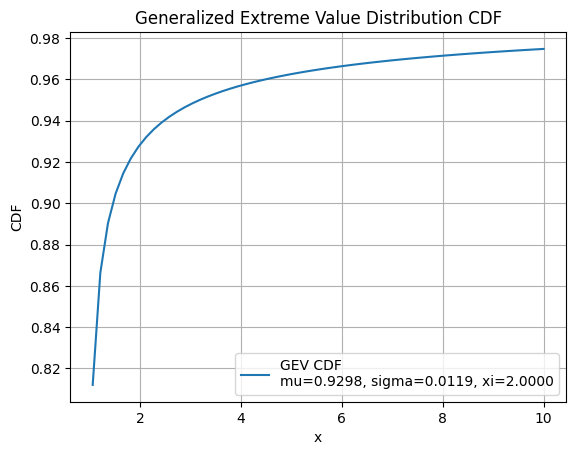

In [13]:
import torch
import matplotlib.pyplot as plt

def gev_cdf(x, mu, sigma, xi):
    assert (sigma > 0).all(), "Scale parameter sigma must be positive"
    
    zeros = xi == 0
    non_zeros = ~zeros
    
    cdf = torch.zeros_like(x)
    
    # Compute the cdf when xi == 0
    if zeros.any():
        cdf[zeros] = torch.exp(-torch.exp(-(x[zeros] - mu) / sigma))
    
    # Compute the cdf when xi != 0
    if non_zeros.any():
        z = (x[non_zeros] - mu) / sigma
        cdf[non_zeros] = torch.exp(-torch.pow(1 + xi * z, -1/xi))

    return cdf

# Parameters
mu = torch.tensor(0.9298013867424842)
sigma = torch.tensor(0.01186108980670213)
xi = torch.tensor(2)

# Values
x_values = torch.linspace(-5, 10, 100)

# Compute CDF
cdf_values = gev_cdf(x_values, mu, sigma, xi)

# Plotting
plt.plot(x_values.numpy(), cdf_values.numpy(), label=f'GEV CDF\nmu={mu.item():.4f}, sigma={sigma.item():.4f}, xi={xi.item():.4f}')
plt.xlabel('x')
plt.ylabel('CDF')
plt.title('Generalized Extreme Value Distribution CDF')
plt.legend()
plt.grid(True)
plt.show()